## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [27]:
dados = pd.read_csv("aptos.csv", sep=",")
dados.head(16)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [28]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


In [29]:
dados2 = dados.dropna()
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 6.1+ KB


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- Metros: Tamanho do apartamento em metros quadrados (m²)
- Valor: Valor do apartamento em reais (R$)
- Quartos: Quantidade de quartos que o apto possue
- Vagas: Vagas de garagem que estão disponíveis para o proprietário
- Reformado: Saber se no apartamento foi realizado alguma reforma
- Bairro: Bairros que os apartamentos estão localizados

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1. Apartamentos que possuem um número maior de quartos são mais caros
2. Apartamentos muito bem localizados tem um valor maior do que apartamentos mal localizados

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [30]:
# Ver se há a necessidade de fazer balanceamento
dados2.groupby('bairro').size()

bairro
Assuncao            9
Baeta Neves        17
Centro             34
Demarchi            5
Ferrazopolis        4
Independencia       3
Iraja               3
Jardim do Mar       2
Jordanopolis        1
Nova Petropolis     3
Pauliceia           2
Piraporinha         1
Planalto            5
Rudge Ramos         9
Santa Teresinha     4
Taboao              4
Vila Lusitania      6
dtype: int64

In [31]:
# Ver se há a necessidade de fazer balanceamento
dados2.groupby('reformado').size()

reformado
0.0    54
1.0    58
dtype: int64

In [32]:
#Fazendo One Hot Encoding
colunasCategorias = ['bairro']
dados2 = pd.get_dummies(data=dados2, columns=colunasCategorias)
display(dados2)

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,555.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

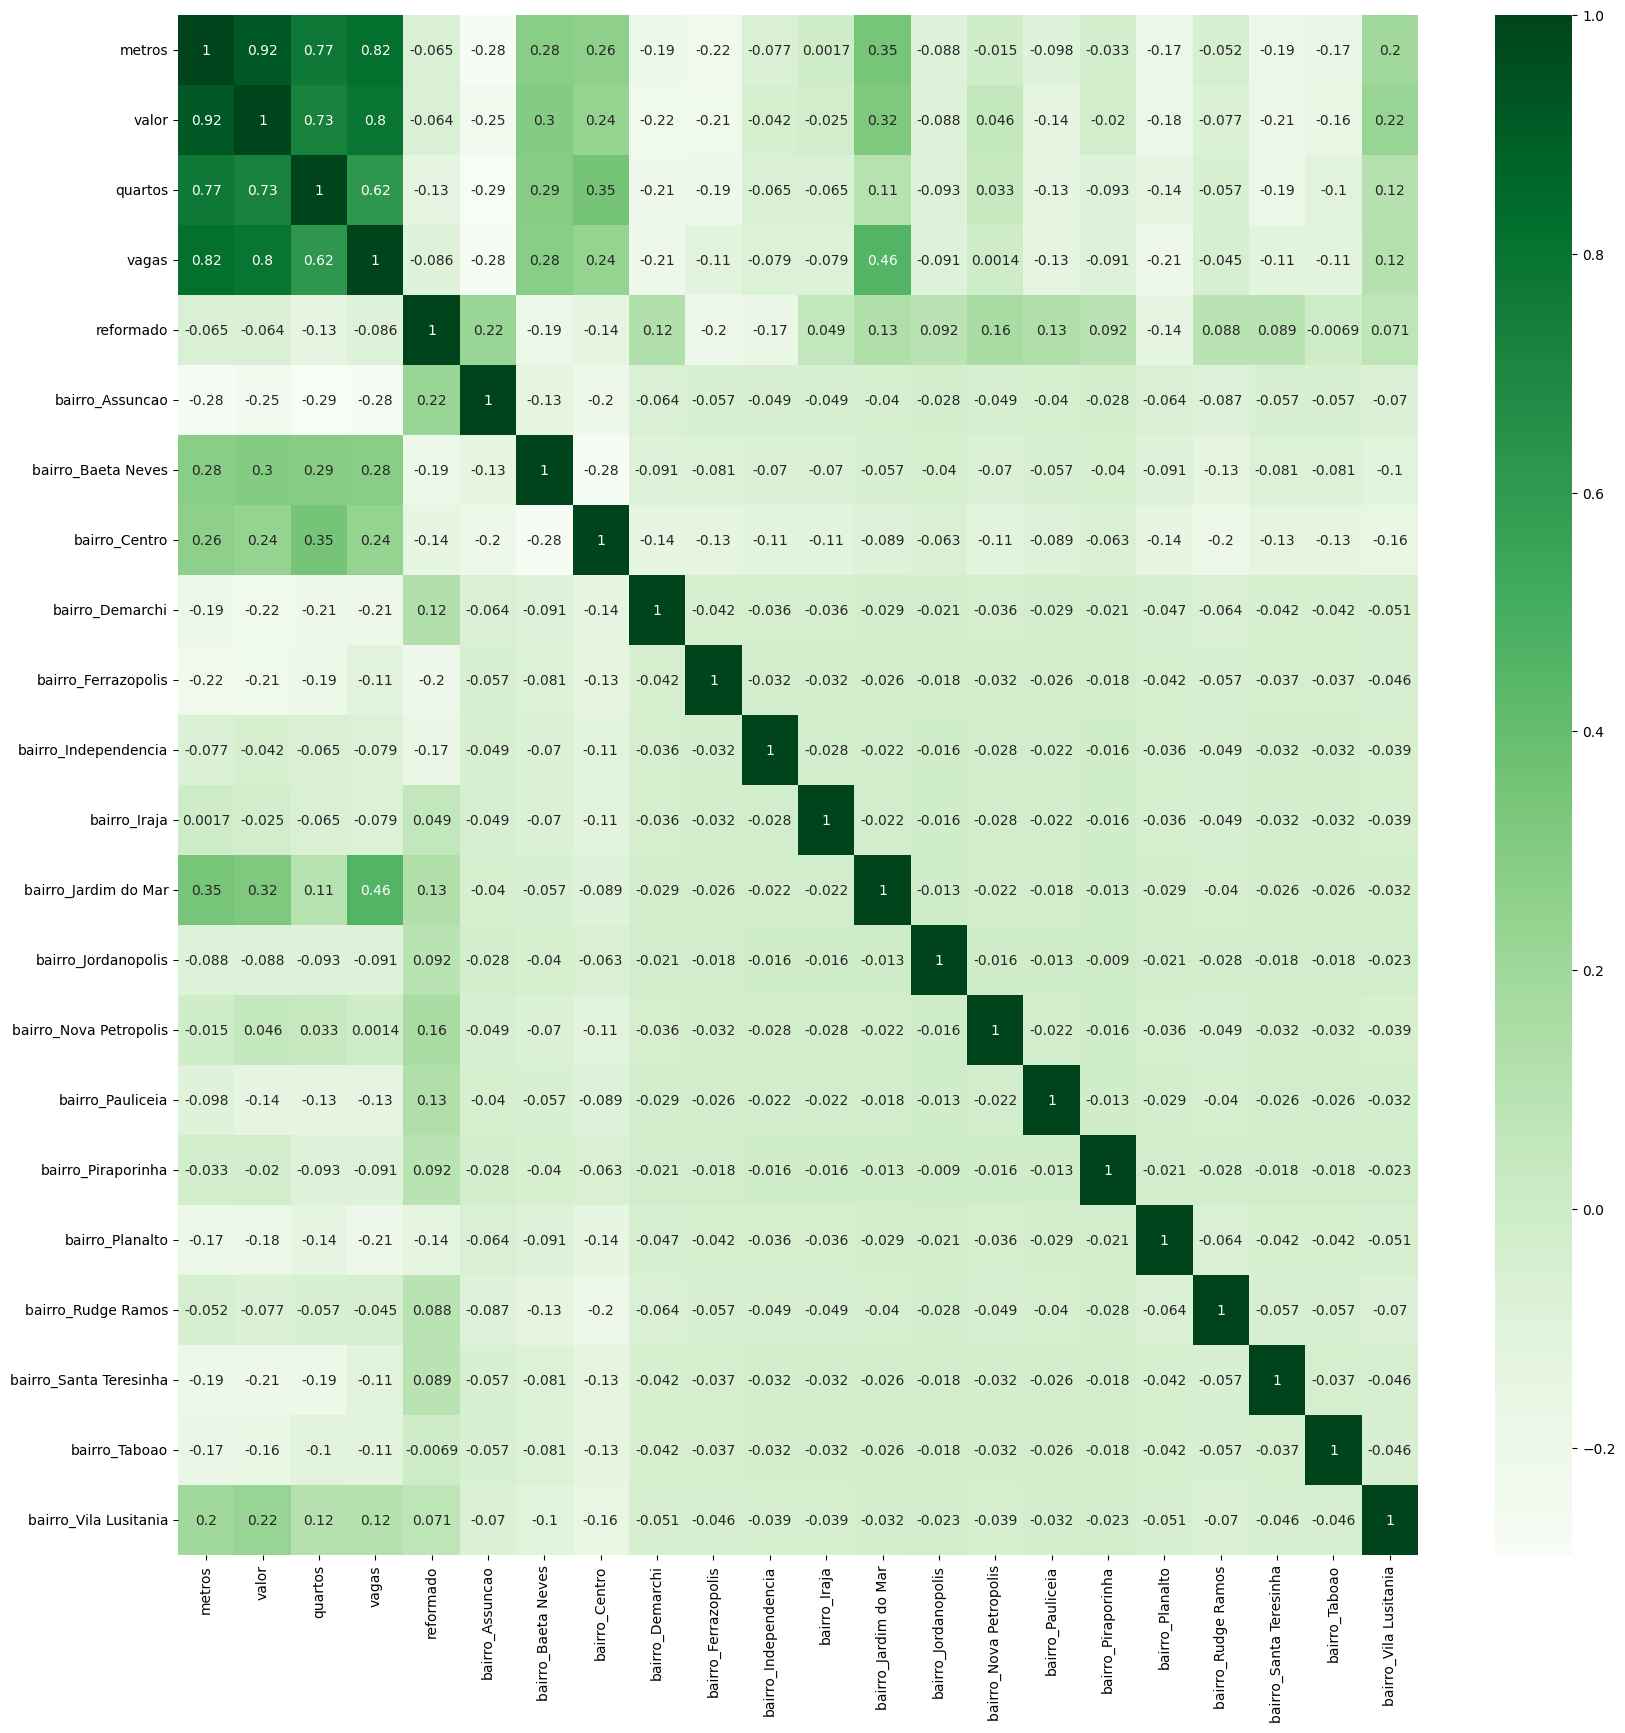

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(dados2.corr(), annot=True, cmap='Greens')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

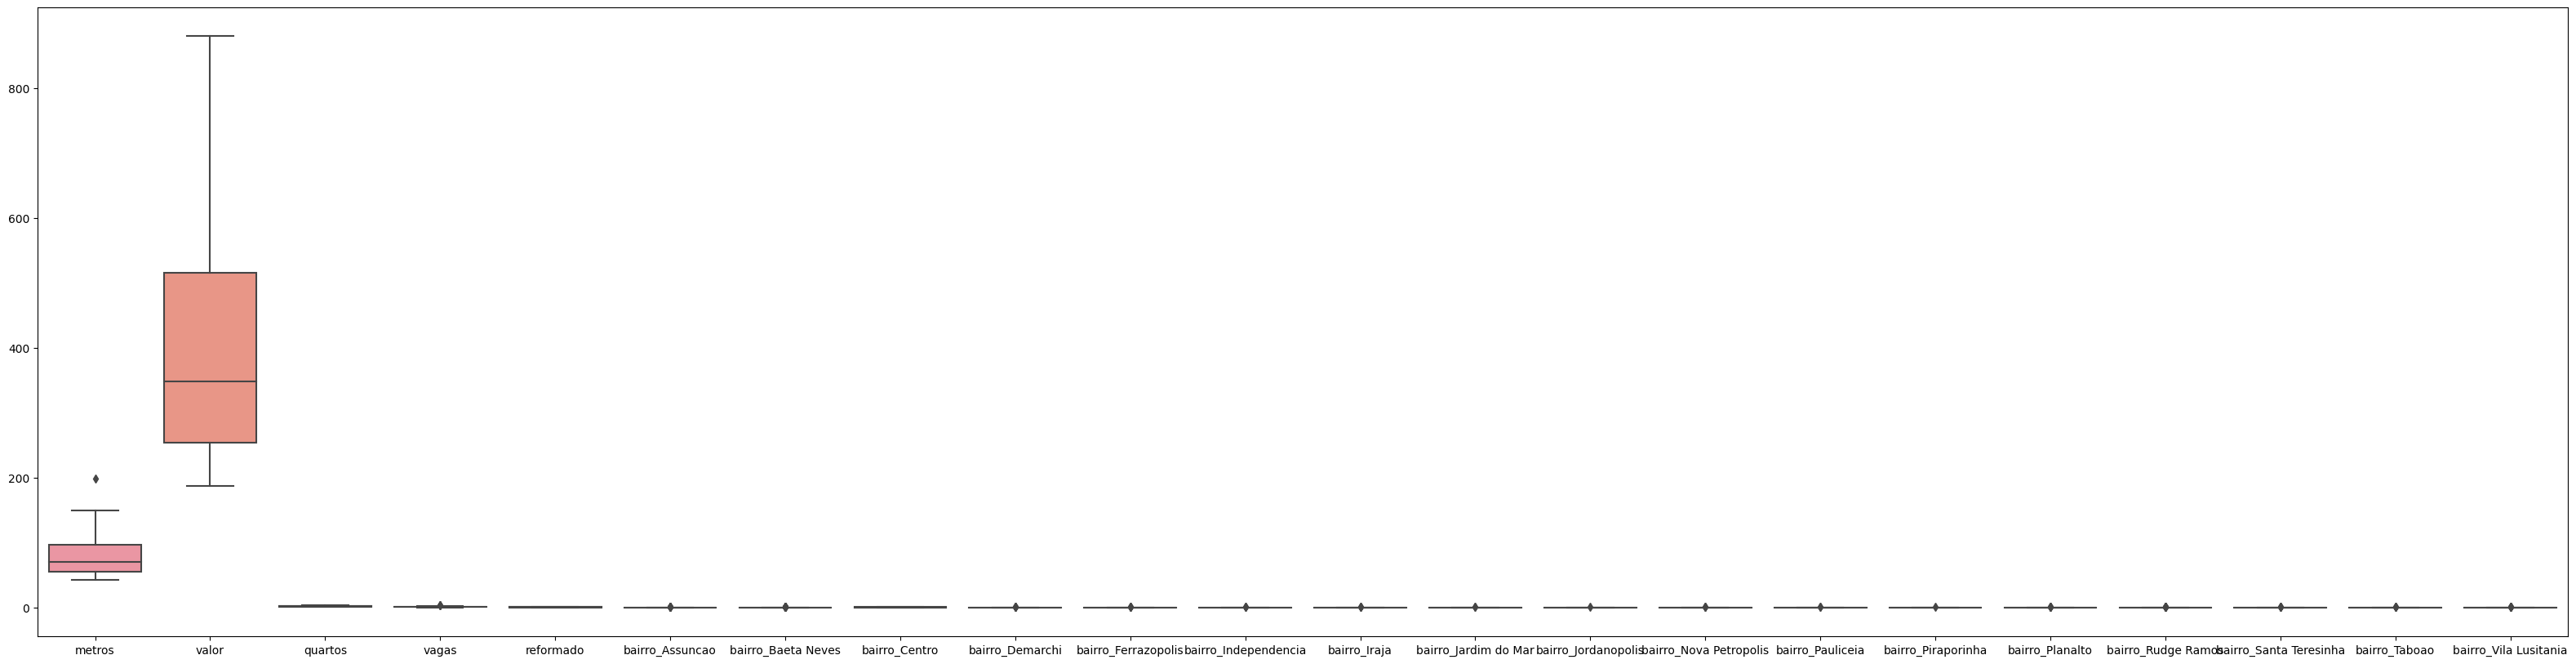

In [34]:
plt.figure(figsize=(40,10))
sns.boxplot(data=dados2)
plt.show()

In [35]:
# Remover outlier

def remove_outlier(dataset, colunas):
    for coluna in colunas:
        Q1 = dataset[coluna].quantile(0.25)
        Q3 = dataset[coluna].quantile(0.75)

        IQR = Q3 - Q1

        menor_limite = Q1 - (1.5 * IQR)
        maior_limite = Q3 + (1.5 * IQR)

        outlier_indice = dataset.loc[ (dataset[coluna] > menor_limite) & (dataset[coluna] < maior_limite)]
    return outlier_indice

In [36]:
dados3 = remove_outlier(dados2, ['metros', 'vagas'])

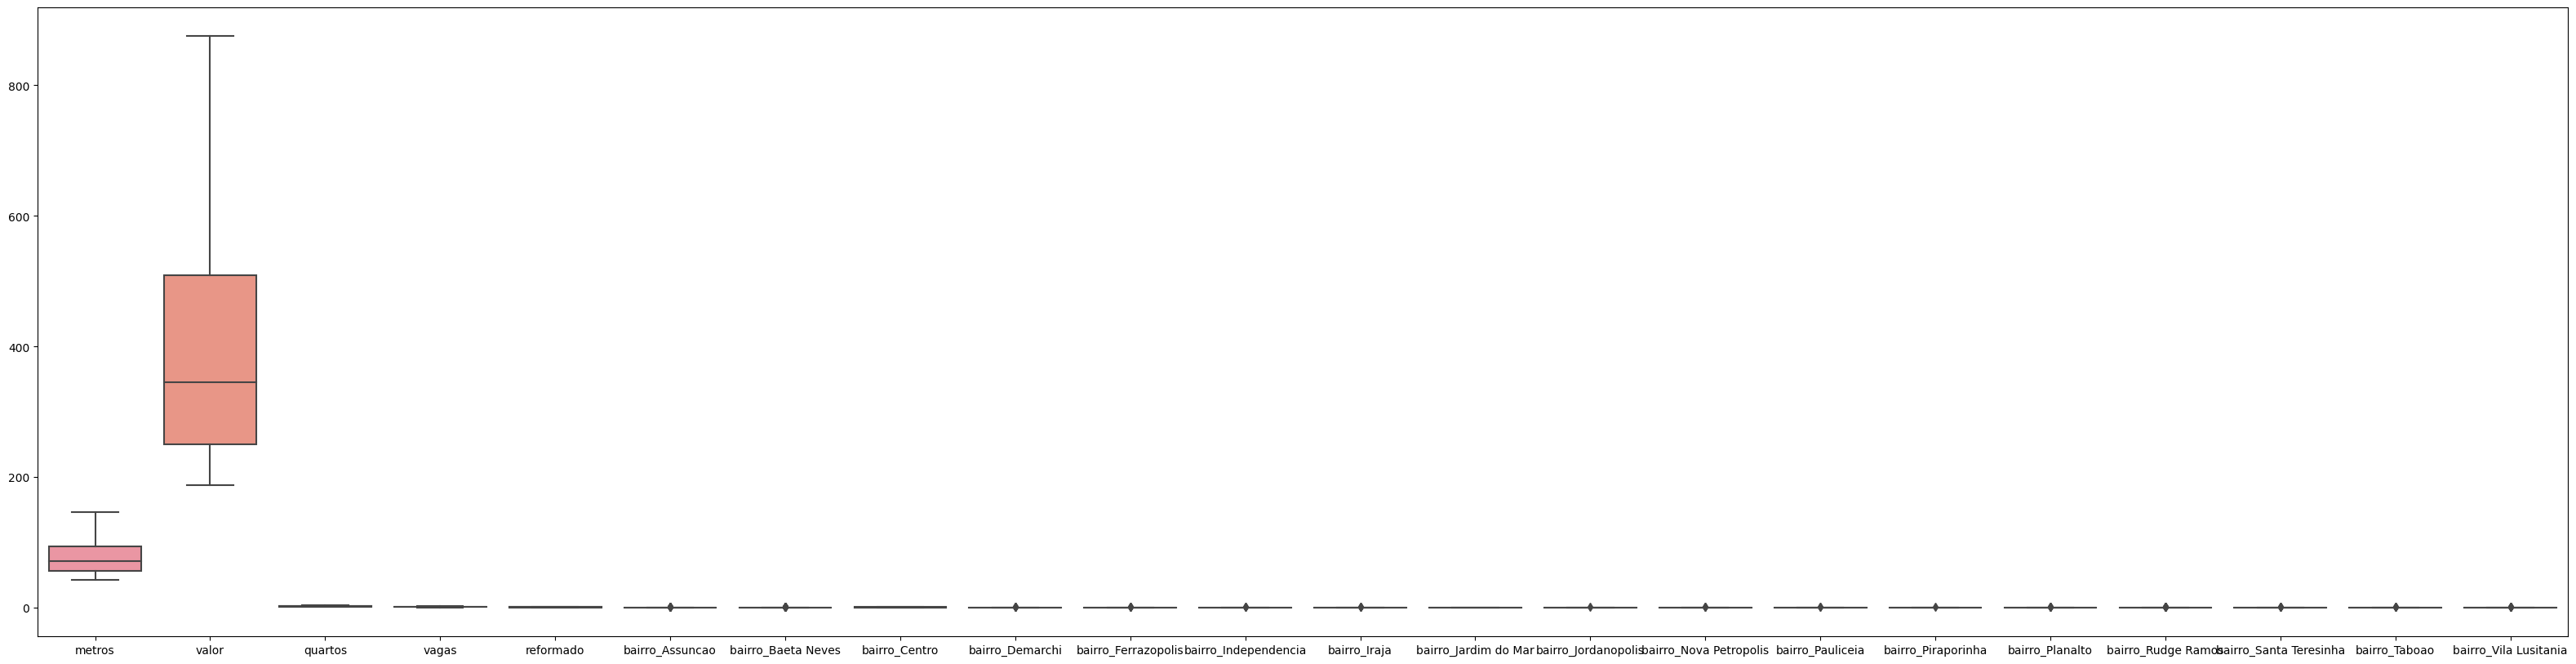

In [37]:
plt.figure(figsize=(40,10))
sns.boxplot(data=dados3)
plt.show()

**Resposta:**  
Sim, foram encontrados outliers no dataset. Para fazer a análise utilizei gráficos do tipo boxplots. Os outliers foram removidos do dataset para evitar desbalanceamento

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    Pois esse Machine Learning vai construir um algoritmo que irá pegar os dados de entrada e saída para predizer novos conjuntos de dados de entrada.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. RandomForest (RandomForestRegressor)
2. Regressão Linear (LinearRegressor)

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Ele combina várias árvores de decisão para conseguir fazer uma previsão de valores numéricos contínuos.
2. O algoritmo usa uma regressão linear entre os dados de entrada e saída para fazer suas previsões.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [59]:
#Treinamento

x = dados3.drop(columns=['valor'])
y = dados3['valor']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [60]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

87
87
22
22


In [61]:
regr = RandomForestRegressor(random_state=42)
regr.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
lr = LinearRegression() 
lr.fit(x_train,y_train) 

LinearRegression()

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [63]:
# Treinamento
y_predicoes = lr.predict(x_test) 

In [64]:
MAE = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes) 
print('MAE de treinamento: ', MAE)

MAE de treinamento:  55.64974737198815


In [65]:
R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes) 
print('R2 de treinamento: ', R2)  # Quanto mais próximos de 1 melhor

R2 de treinamento:  0.7841251468786692


In [78]:
#Teste
y_train_teste = lr.predict(x_train)

In [79]:
MAE = mean_absolute_error(y_true = y_train,      
                          y_pred = y_train_teste) 
print('MAE de teste: ', MAE)

MAE de teste:  44.06925501924683


In [80]:
R2 = r2_score(y_true = y_train,      
              y_pred = y_train_teste) 
print('R2 de teste: ', R2)  # Quanto mais próximos de 1 melhor

R2 de teste:  0.8631097731655414


### Algoritmo 2

In [66]:
# Treinamento
y_predicoes = regr.predict(x_test) 

In [67]:
MAE = mean_absolute_error(y_true = y_test,      
                          y_pred = y_predicoes) 
print('MAE de treinamento: ', MAE)

MAE de treinamento:  52.67368614718614


In [68]:
R2 = r2_score(y_true = y_test,      
              y_pred = y_predicoes) 
print('R2 de treinamento: ', R2)  # Quanto mais próximos de 1 melhor

R2 de treinamento:  0.7648987065671067


In [75]:
# Teste
y_train_teste = regr.predict(x_train)

In [76]:
MAE = mean_absolute_error(y_true = y_train,      
                          y_pred = y_train_teste) 
print('MAE de teste: ', MAE)

MAE de teste:  23.42003056011677


In [77]:
R2 = r2_score(y_true = y_train,      
              y_pred = y_train_teste) 
print('R2 de teste: ', R2)  # Quanto mais próximos de 1 melhor

R2 de teste:  0.9572452652303102


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0.78 | 0.76 |
| teste  | 0.86 | 0.95 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O RandomForestRegression possui um resultado melhor no seu R²

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [88]:
new_apart = [[72,2,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
preco_previsto_lr = lr.predict(new_apart)
print('Linear Regression: ', preco_previsto_lr)

Linear Regression:  [398.12514493]


c:\Users\Bianca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [89]:
new_apart = [[72,2,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
preco_previsto_regr = regr.predict(new_apart)
print('RandomForestRegression: ',preco_previsto_regr)

RandomForestRegression:  [349.82833333]


c:\Users\Bianca\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, pois com o resultado do teste do RandomForestRegression dando um R² de 0.95 sendo bem próximo de 1, é considerado um resultado ótimo. Mostrando que a predisão do algoritmo está mais próximo de correto.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Eu poderia trocar o 1º algoritmo (LinerRegression) por um outro algoritmo que trabalha com árvore de decisão para conseguir obter um resultado melhor.




